# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import (Lasso, LinearRegression, LogisticRegression,
                                  Ridge)
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Part 1

In [2]:
train = pd.read_csv('ann-train.data', header=0, na_values='?', sep=' ')
test = pd.read_csv('ann-test.data', header=0, na_values='?', sep=' ')

# Dropping columns as they are just blank space which are unnecassary. delete if unneeded
# Drop the last two columns from the training dataset
train = train.iloc[:, :-2]
# Drop the last two columns from the testing dataset
test = test.iloc[:, :-2]

X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

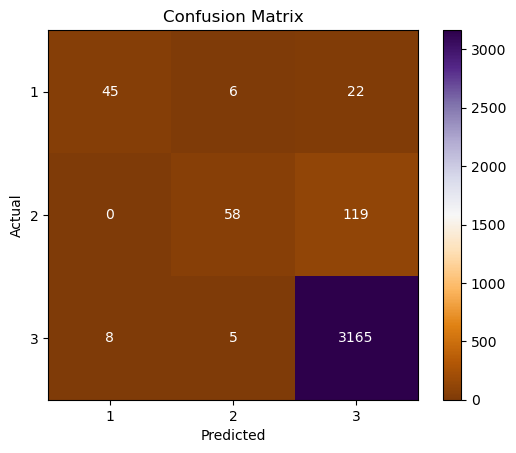

In [4]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with a gradient colormap
plt.imshow(conf_matrix, cmap='PuOr')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add the matrix values to the plot
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')

# Show the plot
plt.show()

# Part 2

In [5]:
testbinary = test
trainbinary = train
testbinary.iloc[:, -1] = test.iloc[:, -1].apply(lambda x: 1 if x == 3 else 0)
trainbinary.iloc[:, -1] = train.iloc[:, -1].apply(lambda x: 1 if x == 3 else 0)

binary_X_train, binary_y_train = trainbinary.iloc[:, :-1], trainbinary.iloc[:, -1]
binary_X_test, binary_y_test = testbinary.iloc[:, :-1], testbinary.iloc[:, -1]

In [6]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(binary_X_train, binary_y_train)

# Make predictions on the testing set
# Set the threshold
threshold = 0.5
# threshold = 0.85

# Get the probability of the positive class
y_pred_prob = model.predict_proba(binary_X_test)[:, -1]

# Apply the threshold to get the predicted class
binary_y_pred = (y_pred_prob >= threshold).astype(int)


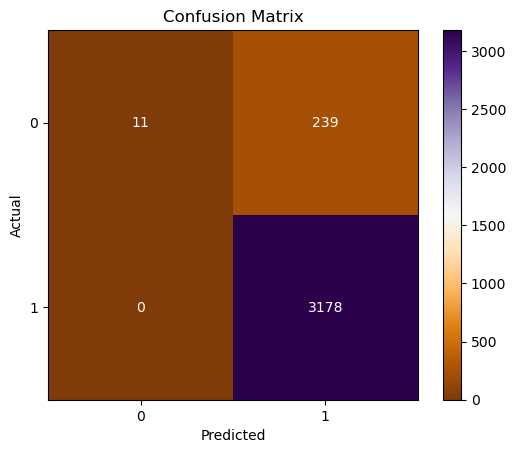

In [7]:
# Calculate the confusion matrix
binary_conf_matrix = confusion_matrix(binary_y_test, binary_y_pred)

# Plot the confusion matrix with a gradient colormap
plt.imshow(binary_conf_matrix, cmap='PuOr')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add the matrix values to the plot
for i in range(binary_conf_matrix.shape[0]):
    for j in range(binary_conf_matrix.shape[1]):
        plt.text(j, i, binary_conf_matrix[i, j], ha='center', va='center', color='white')

# Show the plot
plt.show()

# Part 3

In [8]:
# Create a Ridge model with L2 regularization and fit it to the training data
ridge = Ridge(alpha=0.5)
ridge.fit(binary_X_train, binary_y_train)
y_pred_ridge = ridge.predict(binary_X_test)

# Create a Lasso model with L1 regularization and fit it to the training data
lasso = Lasso(alpha=0.0001)
lasso.fit(binary_X_train, binary_y_train)
y_pred_lasso = lasso.predict(binary_X_test)

# Create a LinearRegression model with sum of squares error loss function and fit it to the training data
lin_reg = LinearRegression()
lin_reg.fit(binary_X_train, binary_y_train)
y_pred_lin_reg = lin_reg.predict(binary_X_test)

In [9]:
print(f"Sum of Squares Coefficients: {lin_reg.coef_}")
print("------------------------------------------")
print(f"L1 reg Coefficients: {lasso.coef_}")
print("------------------------------------------")
print(f"L2 reg Coefficients: {ridge.coef_}")

Sum of Squares Coefficients: [ 4.47102479e-02 -2.01301117e-03  3.60406309e-02  1.00268259e-02
  5.09949075e-02  8.07270588e-02 -5.05899736e-03 -7.62789539e-02
 -2.42035366e-02  3.10962170e-02  8.27811485e-02 -3.48496235e-02
  1.82352078e-01  2.04112711e-02 -4.00869211e+00  3.26543739e+00
  1.31806460e+00 -1.64278722e+00  2.11513342e-01]
------------------------------------------
L1 reg Coefficients: [ 4.16448133e-02  0.00000000e+00  3.43670572e-02  3.00473364e-03
  3.21040942e-02  6.27030491e-02 -0.00000000e+00 -7.94946061e-02
 -1.43481492e-02  1.09707586e-02  6.78849932e-02 -2.60104804e-02
  0.00000000e+00  2.19499580e-02 -4.00082052e+00  4.73284455e-01
  4.53300662e-01 -0.00000000e+00  1.16917672e+00]
------------------------------------------
L2 reg Coefficients: [ 3.91683093e-02  1.44617215e-03  4.47162997e-02  8.55029507e-03
  4.56203463e-02  6.99933668e-02 -2.92556473e-03 -8.13038573e-02
 -1.85834225e-02  3.36493772e-02  8.33322503e-02 -2.95071659e-02
  1.14149691e-01  2.50597203

In [10]:
# Normalize features
scaler = StandardScaler()
X_norm = scaler.fit_transform(binary_X_train)

# Fit Ridge model with L2 regularization and normalized features
ridge = Ridge(alpha=1.0)
ridge.fit(X_norm, binary_y_train)

# Fit Lasso model with L1 regularization and normalized features
lasso = Lasso(alpha=1.0)
lasso.fit(X_norm, binary_y_train)

# Fit Linear regression model with normalized features
lin_reg = LinearRegression()
lin_reg.fit(X_norm, binary_y_train)

# Compare coefficients to previous model
print(f"Sum of Squares Coefficients (normalized features): {lin_reg.coef_}")
print("------------------------------------------")
print(f"L1 reg Coefficients (normalized features): {lasso.coef_}")
print("------------------------------------------")
print(f"L2 reg Coefficients (normalized features): {ridge.coef_}")

Sum of Squares Coefficients (normalized features): [ 0.0146987  -0.00022794  0.00382605  0.00192774  0.00600214  0.00958957
 -0.00061718 -0.01840009 -0.00581504  0.00220142  0.00770894 -0.00546053
  0.00296871  0.00441937 -0.09342323  0.02422873  0.04545096 -0.03057224
  0.0070833 ]
------------------------------------------
L1 reg Coefficients (normalized features): [ 0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0. -0.
  0.]
------------------------------------------
L2 reg Coefficients (normalized features): [ 0.01469679 -0.00022733  0.00382586  0.00192781  0.00599536  0.00958286
 -0.00061781 -0.01839664 -0.00581294  0.00220043  0.00770563 -0.00545903
  0.00296698  0.00441965 -0.09340915  0.02421669  0.04525385 -0.03044087
  0.00726568]
